# NAME : MU DARSHAN

# INFOSYS SPRINGBOARD 5.0

# Project TumorTrace :


# BASED AI FOR BREAST CANCER DETECTION

In [ ]:
!pip install scikit-image

In [29]:
import kagglehub
classification_roi_path = '/kaggle/input/my-dataset'
print(classification_roi_path)

/kaggle/input/my-dataset


In [30]:
import pandas as pd 

In [31]:
import torch

import torchvision

from torchvision import datasets, transforms

import numpy as np

import matplotlib.pyplot as plt

## Transformer function for augmented and actual dataset

In [32]:
transformAug = transforms.Compose([transforms.Resize(224),

                                transforms.CenterCrop(224),

                                transforms.ColorJitter(brightness=2),

                                transforms.RandomResizedCrop(size=(224, 224), antialias=True),

                                transforms.RandomHorizontalFlip(p=0.5),

                                transforms.RandomVerticalFlip(p=0.5),

                                transforms.ToTensor(),

                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])

transform = transforms.Compose(

    [transforms.Resize(224),

     transforms.CenterCrop(224),

     transforms.ToTensor()])

In [33]:
train_ds = dataset = datasets.ImageFolder('/kaggle/input/my-dataset/train', transform=transformAug)

test_ds = dataset = datasets.ImageFolder('/kaggle/input/my-dataset/test', transform=transform)

val_ds = dataset = datasets.ImageFolder('/kaggle/input/my-dataset/val', transform=transform)



# train_aug_ds = dataset = datasets.ImageFolder('/kaggle/input/classification-roi/train/', transform=transformAug)

# test_aug_ds = dataset = datasets.ImageFolder('/kaggle/input/classification-roi/test/', transform=transform)

# val_aug_ds = dataset = datasets.ImageFolder('/kaggle/input/classification-roi/val/', transform=transform)

In [34]:
batch_size = 32

## Loading data using DataLoader

In [35]:
trainloader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)



trainloaderAug = torch.utils.data.DataLoader(train_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

testloaderAug = torch.utils.data.DataLoader(test_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

valloaderAug = torch.utils.data.DataLoader(val_ds, batch_size=batch_size,

                                          shuffle=True, num_workers=2)

In [36]:
classes = ('Melignant', 'Benign')

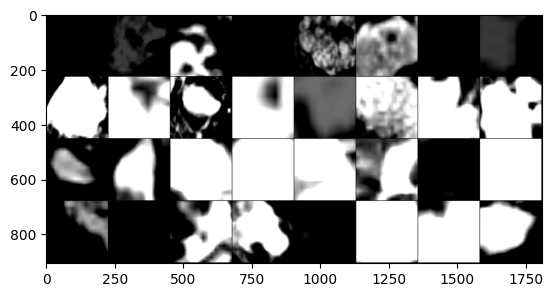

Benign Benign Benign Benign Melignant Benign Benign Melignant Benign Melignant Melignant Benign Melignant Melignant Benign Benign Melignant Benign Benign Benign Benign Benign Melignant Melignant Benign Benign Benign Benign Benign Benign Benign Benign


In [37]:
def imshow(img):

    npimg = img.numpy()

    # print(img.shape)

    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    plt.show()



dataiter = iter(trainloader)

images, labels = next(dataiter)



imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

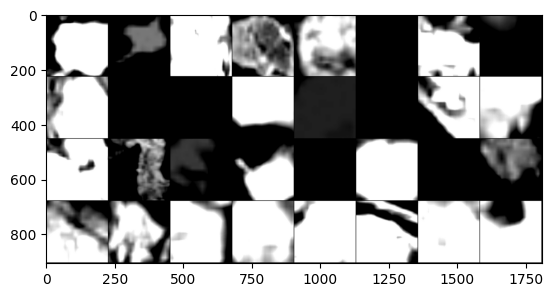

Benign Benign Melignant Benign Melignant Benign Benign Benign Melignant Benign Benign Benign Benign Benign Benign Melignant Benign Benign Benign Benign Benign Benign Benign Benign Benign Benign Benign Melignant Melignant Benign Benign Benign


In [38]:
def imshow(img):

    npimg = img.numpy()

    # print(img.shape)

    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    plt.show()



dataiter = iter(trainloaderAug)

images, labels = next(dataiter)



imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [39]:
from collections import Counter

print(dict(Counter(sample_tup[1] for sample_tup in val_ds.imgs)))

{0: 408, 1: 1581}


# Loading VGG 16 Model

In [40]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [41]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [42]:
import torch

from PIL import Image

import torchvision.transforms as transforms



input_image = Image.open('/kaggle/input/my-dataset/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg').convert('RGB')



preprocess = transforms.Compose([

    transforms.Resize(256),

    transforms.CenterCrop(224),

    transforms.ToTensor(),

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])



input_tensor = preprocess(input_image)

input_batch = input_tensor.unsqueeze(0)



if torch.cuda.is_available():

    input_batch = input_batch.to('cuda')

    model.to('cuda')



model.eval()  # Ensures the model is in evaluation mode

with torch.no_grad():

    output = model(input_batch)



# Process 'output' if needed


In [43]:
print(output)

tensor([[ 1.7723e-01,  2.8148e+00, -7.6697e-01,  2.8151e-01, -3.1437e-01,
          2.3726e+00, -3.5673e+00, -1.6575e+00, -2.1122e+00, -2.0490e+00,
          1.7995e+00, -3.0830e+00, -2.9945e+00, -1.8305e+00, -2.1870e+00,
         -1.9123e+00, -1.3854e+00, -2.7219e+00, -2.4119e+00, -2.4103e+00,
         -1.3219e+00, -1.7210e+00, -2.2531e+00, -7.6893e-01, -2.1583e+00,
         -4.6211e-01,  1.4578e+00,  4.3685e-01,  1.2775e+00,  3.9830e+00,
         -1.7718e+00,  1.3678e+00,  1.4397e+00, -5.0775e-01,  4.7667e-01,
         -8.5749e-01, -1.0462e+00, -4.2227e+00,  1.7013e+00, -3.7241e-01,
         -5.8306e-01,  4.2426e-01, -1.2109e-01,  1.9852e+00, -3.7804e-01,
         -5.6655e-01, -1.5815e+00,  2.1921e+00, -1.6166e+00, -3.6963e+00,
         -3.6403e+00,  1.7829e+00,  1.4911e+00,  5.0929e-01, -1.7688e-01,
         -9.5112e-01, -6.8134e-01, -2.3637e+00, -4.2169e+00,  4.3030e+00,
          1.5067e+00, -1.2390e+00,  1.1251e+00,  2.7263e+00,  3.1482e+00,
         -5.5739e-02,  2.5862e+00, -2.

In [44]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)

print(probabilities)

tensor([9.1300e-05, 1.2762e-03, 3.5515e-05, 1.0133e-04, 5.5844e-05, 8.2014e-04,
        2.1590e-06, 1.4576e-05, 9.2507e-06, 9.8543e-06, 4.6239e-04, 3.5041e-06,
        3.8284e-06, 1.2261e-05, 8.5846e-06, 1.1298e-05, 1.9135e-05, 5.0281e-06,
        6.8552e-06, 6.8662e-06, 2.0389e-05, 1.3680e-05, 8.0348e-06, 3.5445e-05,
        8.8342e-06, 4.8174e-05, 3.2857e-04, 1.1836e-04, 2.7437e-04, 4.1050e-03,
        1.3002e-05, 3.0028e-04, 3.2265e-04, 4.6024e-05, 1.2317e-04, 3.2441e-05,
        2.6861e-05, 1.1210e-06, 4.1913e-04, 5.2694e-05, 4.2686e-05, 1.1688e-04,
        6.7751e-05, 5.5676e-04, 5.2399e-05, 4.3396e-05, 1.5728e-05, 6.8470e-04,
        1.5186e-05, 1.8976e-06, 2.0071e-06, 4.5479e-04, 3.3967e-04, 1.2726e-04,
        6.4074e-05, 2.9542e-05, 3.8690e-05, 7.1937e-06, 1.1275e-06, 5.6527e-03,
        3.4501e-04, 2.2151e-05, 2.3556e-04, 1.1682e-03, 1.7814e-03, 7.2326e-05,
        1.0154e-03, 6.0671e-06, 1.9004e-03, 2.0687e-05, 1.9973e-05, 3.3435e-04,
        4.5844e-05, 4.8916e-03, 3.9988e-

## plot the pixel value range from an image

In [45]:
import matplotlib.pyplot as plt

import numpy as np

from PIL import Image

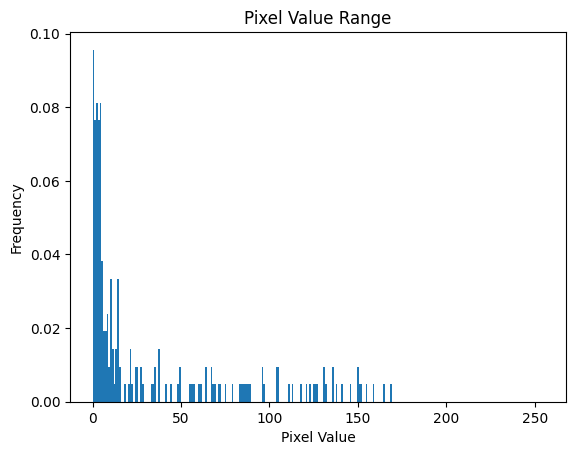

In [46]:
image_path = '/kaggle/input/my-dataset/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'

image = Image.open(image_path).convert('L') 

image_array = np.array(image)



plt.hist(image_array.ravel(), bins=256, range=(0, 255), density=True)

plt.title('Pixel Value Range')

plt.xlabel('Pixel Value')

plt.ylabel('Frequency')

plt.show()

## Ploting HOG visualizatio graph of Image

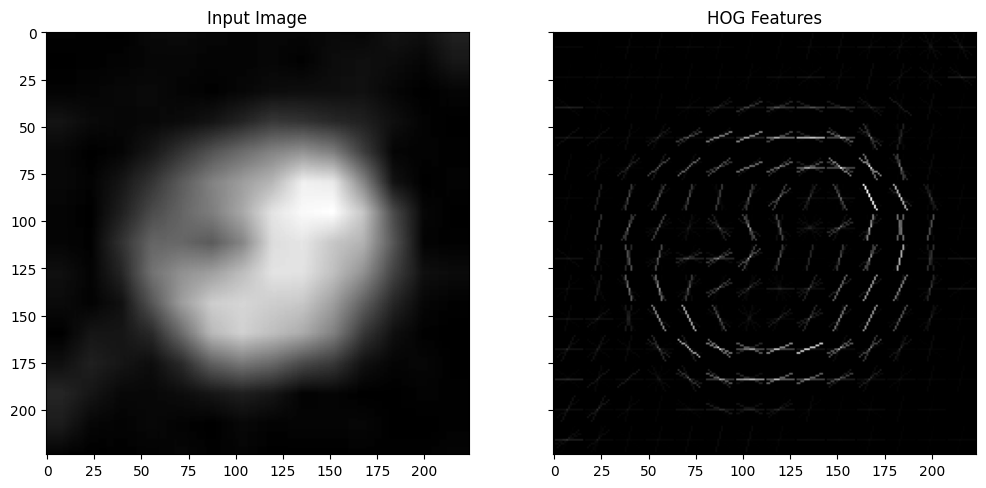

In [47]:
from skimage.feature import hog

from skimage import data, exposure

import matplotlib.pyplot as plt

from PIL import Image



image_path = '/kaggle/input/my-dataset/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'

input_image = Image.open(image_path).convert('L')

preprocess = transforms.Compose([

    transforms.Resize(224),

    transforms.CenterCrop(224),

    transforms.ToTensor()

])

image_tensor = preprocess(input_image)

image_numpy = image_tensor.numpy().squeeze()



hog_features, hog_image = hog(image_numpy, pixels_per_cell=(16, 16),

                              cells_per_block=(2, 2), visualize=True)



fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)



ax[0].imshow(image_numpy, cmap=plt.cm.gray)

ax[0].set_title('Input Image')



hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)

ax[1].set_title('HOG Features')



plt.show()


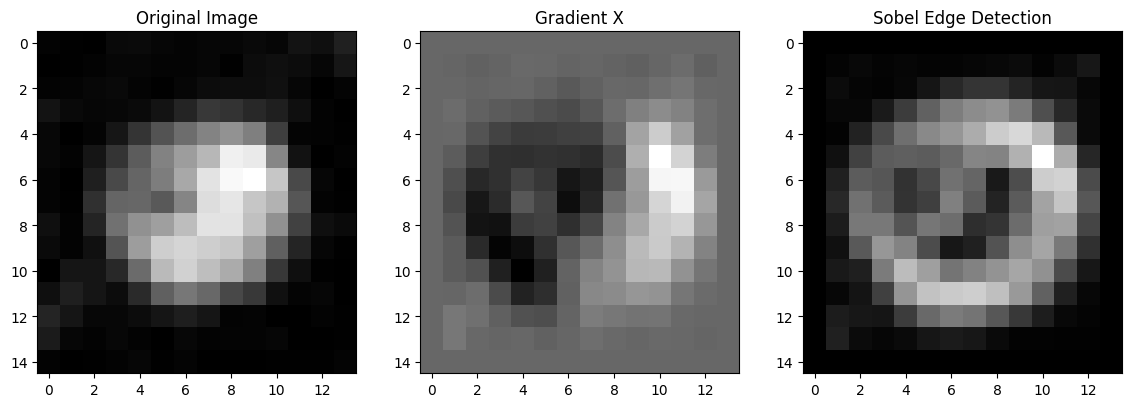

In [56]:
import numpy as np

import cv2

import matplotlib.pyplot as plt



def sobel_operator(image_path):

    image_path = '/kaggle/input/my-dataset/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'

    image = Image.open(image_path).convert('L')



    img_array = np.array(image)

    

    Kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])



    rows, cols = image_array.shape



    Ix = np.zeros((rows, cols))

    Iy = np.zeros((rows, cols))

    G = np.zeros((rows, cols))



    for i in range(1, rows-1):

        for j in range(1, cols-1):

            

            Ix[i, j] = np.sum(np.multiply(Kx, image_array[i-1:i+2, j-1:j+2]))

            Iy[i, j] = np.sum(np.multiply(Ky, image_array[i-1:i+2, j-1:j+2]))

            G[i, j] = np.sqrt(Ix[i, j]**2 + Iy[i, j]**2)



    G = (G / G.max()) * 255



    plt.figure(figsize=(14, 7))

    plt.subplot(1, 3, 1)

    plt.imshow(image, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 3, 2)

    plt.imshow(Ix, cmap='gray')

    plt.title('Gradient X')

    plt.subplot(1, 3, 3)

    plt.imshow(G, cmap='gray')

    plt.title('Sobel Edge Detection')

    plt.show()



sobel_operator('/kaggle/input/my-dataset/test/Benign/BreaDM-Be-1914/VIBRANT/p-031.jpg')


In [57]:
!pip install utils

In [60]:
%matplotlib inline

# Visualization

import matplotlib as mpl

import matplotlib.pyplot as plt



# Linear algebra operations

import numpy as np



# Image IO

import imageio

import utils


In [51]:
import imageio



ht = np.array([[1, 2, 1]])





hc = np.array([[1, 0, -1]])





Hx = ht.T*hc

Hy = hc.T*ht



print(Hx, end=' Hx\n\n')

print(Hy, end=' Hy\n\n')

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] Hx

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] Hy



In [52]:
def convolve(x, h):

    xh, xw = x.shape

    hh, hw = h.shape

    rh, rw = np.array(h.shape)//2

    output = np.zeros(x.shape)

    for n1 in range(rh, xh-rh):

        for n2 in range(rw, xw-rw):

            value = 0

            for k1 in range(hh):

                for k2 in range(hw):

                    value += h[k1, k2]*x[n1 + k1 - rh, n2 + k2 - rw]

            output[n1, n2] = value

    return output

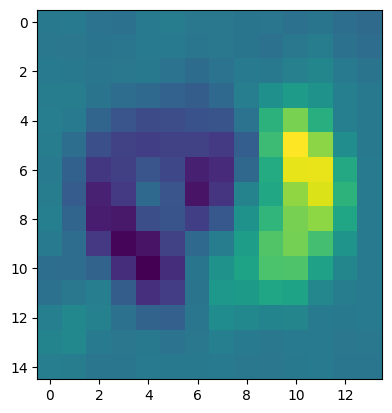

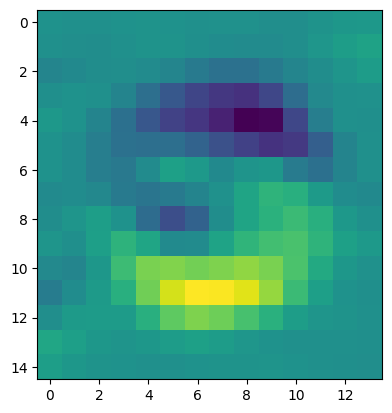

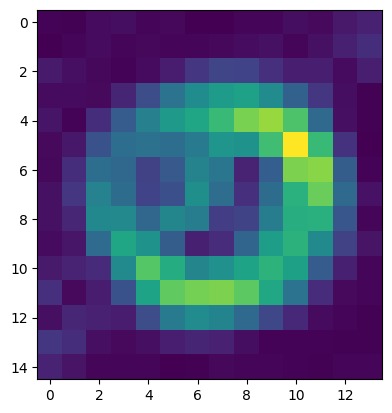

In [53]:
img_in = Image.open(image_path).convert('L')


r=1

img_pad = np.pad(

    img_in,

    ((r, r), (r, r)),

    'edge'

)



# Convolution

Gx = convolve(img_pad, Hx)[r:-r, r:-r]

plt.imshow(Gx)

plt.show()



Gy = convolve(img_pad, Hy)[r:-r, r:-r]

plt.imshow(Gy)

plt.show()



G = np.sqrt( Gy*Gy + Gx*Gx)

plt.imshow(G)

plt.show()

# Mean_Variance_Median Binary Pointer

In [61]:
def sobel_operators(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= center_pixel:

                    binary_pattern += 2**ind

            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('Variance-based LBP Image')

    plt.show()




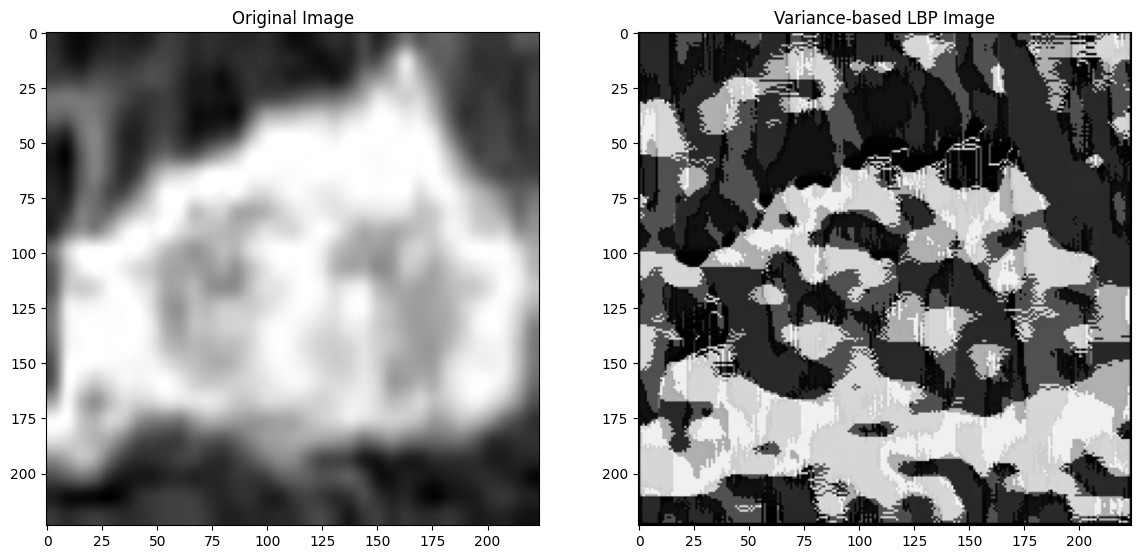

In [62]:
sobel_operators('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

In [ ]:
def variance_based_lbp(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            variance = np.var(neighborhood)

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= center_pixel + variance:

                    binary_pattern += 2**ind

            lbp_image[i, j] = binary_pattern

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('Variance-based LBP Image')

    plt.show()



variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')

variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')

variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')

variance_based_lbp('./clasification-roi/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')


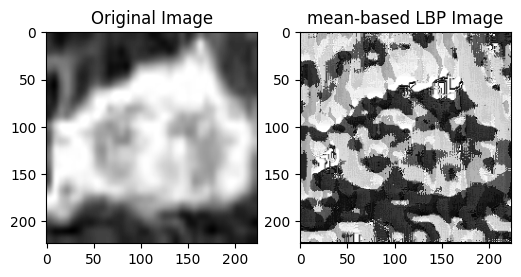

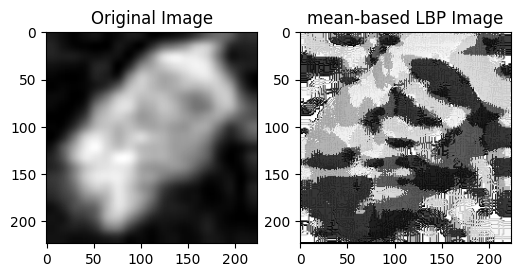

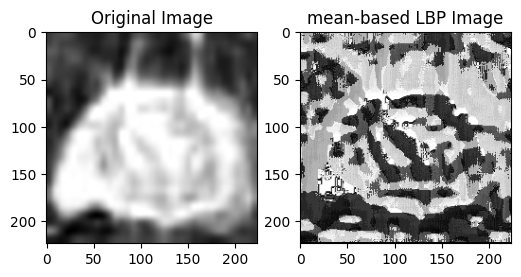

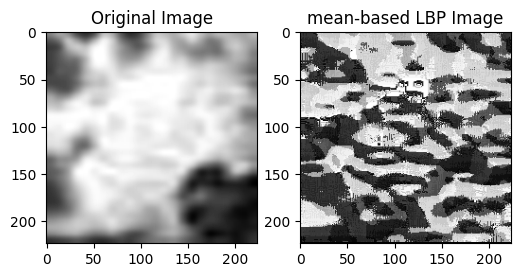

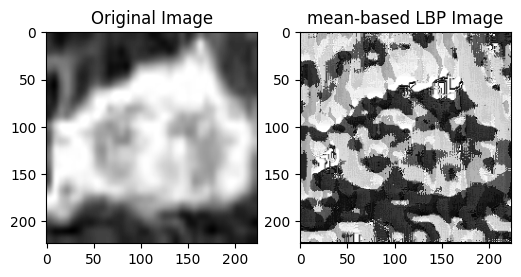

In [64]:
def mean_based_lbp(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            mean = np.mean(neighborhood)

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= mean:

                    binary_pattern += 2**ind

            lbp_image[i, j] = binary_pattern

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('mean-based LBP Image')

    plt.show()



mean_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

mean_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')

mean_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')

mean_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')

mean_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

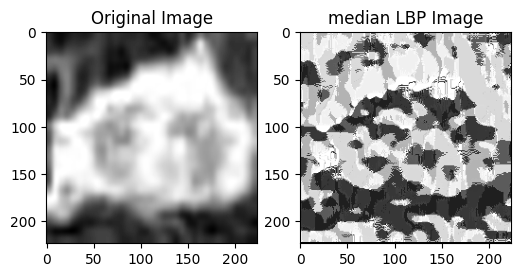

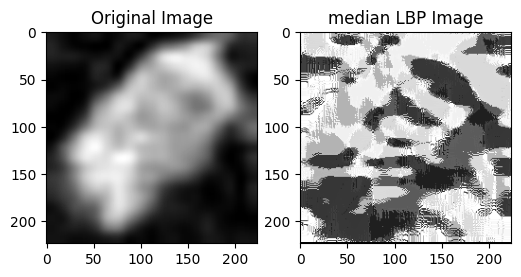

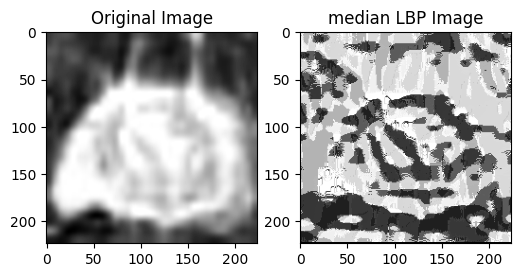

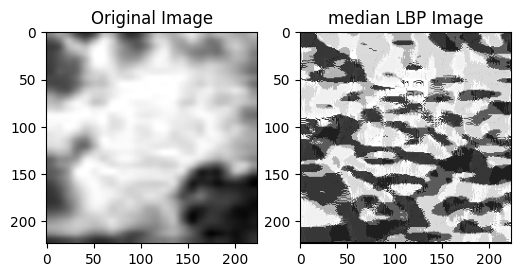

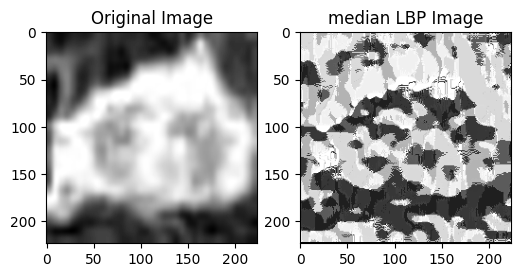

In [65]:
def median_based_lbp(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            median = np.median(neighborhood)

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= median:

                    binary_pattern += 2**ind

            lbp_image[i, j] = binary_pattern

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('median LBP Image')

    plt.show()



median_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

median_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')

median_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')

median_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')

median_based_lbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')


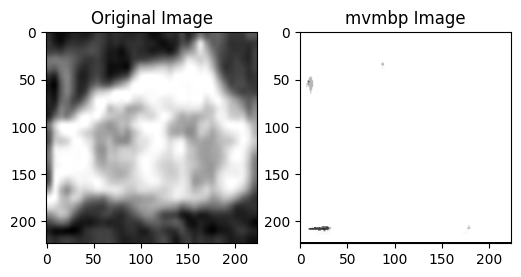

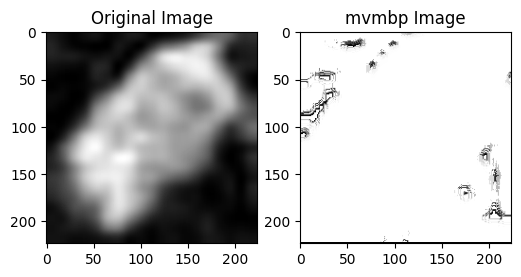

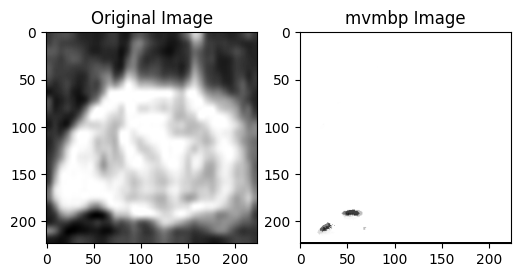

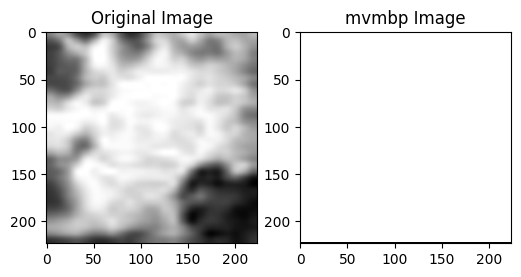

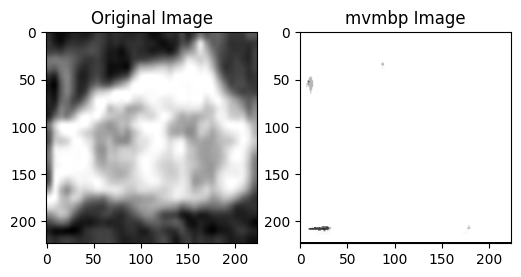

In [66]:
def mvmbp(image_path):

    image = Image.open(image_path).convert('L')

    image = image.resize((224,224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            neighborhood = neighborhood.flatten()

            median = np.median(neighborhood)

            mean = np.mean(neighborhood)

            variance = np.var(neighborhood)

            threshold =  (median + np.sqrt(variance) + mean)/3

            surrounding_pixels = np.delete(neighborhood, 4)

            binary_pattern = 0

            for ind in range(8):

                if neighborhood[ind] >= threshold:

                    binary_pattern += 2**ind

            lbp_image[i, j] = binary_pattern

    

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 2, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('mvmbp Image')

    plt.show()



mvmbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')

mvmbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-1806/SUB2/p-031.jpg')

mvmbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB8/p-051.jpg')

mvmbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-1813/VIBRANT/p-044.jpg')

mvmbp('/kaggle/input/my-dataset/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg')


# GLCM ( gray scale coccurrence matrix)

In [67]:
import numpy as np

import skimage.io as io

import skimage.color as color

import skimage.feature as feature



# Load your image

image = io.imread('/kaggle/input/my-dataset/test/Malignant/BreaDM-Ma-1908/SUB3/p-044.jpg')



# Convert to grayscale if not already

if len(image.shape) == 3:

    image = color.rgb2gray(image)



# Convert the grayscale image to uint8

image = (image * 255).astype(np.uint8)



# Define distances and angles

distances = [1, 2, 3]

angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]



# Compute the GLCM

glcm = feature.graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)



# Compute properties

contrast = feature.graycoprops(glcm, 'contrast')

dissimilarity = feature.graycoprops(glcm, 'dissimilarity')

homogeneity = feature.graycoprops(glcm, 'homogeneity')

energy = feature.graycoprops(glcm, 'energy')

correlation = feature.graycoprops(glcm, 'correlation')

ASM = feature.graycoprops(glcm, 'ASM')



# Print properties

print('Contrast:\n', contrast)

print('Dissimilarity:\n', dissimilarity)

print('Homogeneity:\n', homogeneity)

print('Energy:\n', energy)

print('Correlation:\n', correlation)

print('ASM:\n', ASM)


Contrast:
 [[1686.42279412 2548.7578125  1552.125      2833.28125   ]
 [5100.13333333 2548.7578125  3788.7254902  2833.28125   ]
 [8812.08823529 7457.56888889 5950.64705882 8287.72888889]]
Dissimilarity:
 [[28.03308824 33.8984375  22.55147059 35.78125   ]
 [50.88627451 33.8984375  39.09411765 35.78125   ]
 [68.55042017 62.58222222 51.57142857 66.28888889]]
Homogeneity:
 [[0.09826406 0.10716989 0.12962513 0.11304148]
 [0.08813006 0.10716989 0.12181414 0.11304148]
 [0.08217468 0.09619171 0.0818929  0.08963995]]
Energy:
 [[0.0719969  0.07724109 0.07498558 0.07411588]
 [0.06758309 0.07724109 0.07409586 0.07411588]
 [0.06420465 0.07516238 0.06253309 0.06710964]]
Correlation:
 [[0.89639481 0.84167908 0.90755972 0.82380426]
 [0.68183317 0.84167908 0.77520841 0.82380426]
 [0.45646148 0.52045684 0.64667892 0.46912593]]
ASM:
 [[0.00518355 0.00596619 0.00562284 0.00549316]
 [0.00456747 0.00596619 0.0054902  0.00549316]
 [0.00412224 0.00564938 0.00391039 0.0045037 ]]


In [68]:
import torch

import torchvision.models as models

vgg16 = models.vgg16(pretrained=True)

vgg16.eval()

print(vgg16)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [69]:
import torch
import torch.nn as nn
import torchvision.models as models


class Custom(nn.Module):

    def __init__(self, num_classes=2):
        super(Custom ,self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        # Pass the input through the features layer
        x = self.features(x)
        # Use the avgpool layer
        x = self.avgpool(x)
        # Reshape the output to a 2D tensor
        x = torch.flatten(x, 1)
        # Pass the reshaped output to the custom classifier
        x = self.classifier(x)
        return x

model = Custom(num_classes=2)
print(model)


Custom(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

In [71]:
import numpy as np
import torch
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)

        self.val_loss_min = val_loss


In [72]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import os

# Define your model, assuming it's already defined as in your previous message

# model = Custom(num_classes=2)  # Make sure to import and define your model correctly

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Training Function

def train(epoch, model, num_epochs, loader, criterion, l2_decay, lr):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0

    for data, label in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f'Train Accuracy: {accuracy:.2f}%')


In [73]:
# Validation Function

def validation(model, val_dataloader):
    model.eval()
    correct = 0
    all_predictions = []
    all_targets = []
    possibilities = None
    
    with torch.no_grad():
        for data, target in val_dataloader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss = F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()
            pred = val_output.argmax(dim=1, keepdim=True)
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            if possibilities is None:
                possibilities = prob
            else:
                possibilities = np.concatenate((possibilities, prob), axis=0)
            correct += pred.eq(target.view_as(pred)).cpu().sum().item()

    all_predictions = np.array(all_predictions).flatten()
    all_targets = np.array(all_targets).flatten()
    cm = confusion_matrix(all_targets, all_predictions)
    print(f'Confusion Matrix:\n{cm}')
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[all_targets.astype(int)]

    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())

    auc_value = auc(fpr, tpr)
    specificity = 1 - fpr[1]
    sensitivity = tpr[1]
    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')

    test_loss /= len(val_dataloader.dataset)
    accuracy = 100. * correct / len(val_dataloader.dataset)
    print(f'Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return accuracy, test_loss, auc_value


In [74]:
best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)
project_name = "tumor_classification"
model_name = "vgg16"
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 5e-4
lr = 0.001
for epoch in range(1, num_epochs + 1):
    train(epoch, model, num_epochs, trainloader, criterion, l2_decay, lr)

    with torch.no_grad():
        accuracy, val_loss, auc_value = validation(model, valloader)

    state_dict = model.state_dict()
    model_save_dir = os.path.join('model', project_name, model_name)

    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    early_stop(val_loss, model)
    if auc_value > best_accuracy:
        best_accuracy = auc_value
        torch.save(state_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'))

    if early_stop.early_stop:
        print("Early stopping")
        break

# Load the best model
# model.load_state_dict(torch.load(os.path.join(model_save_dir, f'{model_name}_{epoch}.pth')))
print("Model loaded with the best validation loss")


Epoch 2/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 73.46%


Confusion Matrix:
[[   2  406]
 [   8 1573]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9170
Validation Loss: 0.0010, Accuracy: 79.19%
Validation loss decreased (inf --> 0.001047).  Saving model ...


Epoch 3/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 74.94%


Confusion Matrix:
[[ 137  271]
 [  55 1526]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9281
Validation Loss: 0.0012, Accuracy: 83.61%
EarlyStopping counter: 1 out of 20


Epoch 4/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 75.81%


Confusion Matrix:
[[ 217  191]
 [ 186 1395]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9063
Validation Loss: 0.0011, Accuracy: 81.05%
EarlyStopping counter: 2 out of 20


Epoch 5/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 76.35%


Confusion Matrix:
[[ 204  204]
 [  75 1506]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9496
Validation Loss: 0.0009, Accuracy: 85.97%
Validation loss decreased (0.001047 --> 0.000869).  Saving model ...


Epoch 6/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 76.87%


Confusion Matrix:
[[ 228  180]
 [ 194 1387]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9068
Validation Loss: 0.0006, Accuracy: 81.20%
Validation loss decreased (0.000869 --> 0.000592).  Saving model ...


Epoch 7/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 77.17%


Confusion Matrix:
[[ 195  213]
 [ 155 1426]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9108
Validation Loss: 0.0009, Accuracy: 81.50%
EarlyStopping counter: 1 out of 20


Epoch 8/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 77.26%


Confusion Matrix:
[[ 252  156]
 [ 230 1351]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9157
Validation Loss: 0.0011, Accuracy: 80.59%
EarlyStopping counter: 2 out of 20


Epoch 9/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 77.44%


Confusion Matrix:
[[ 198  210]
 [ 106 1475]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9372
Validation Loss: 0.0013, Accuracy: 84.11%
EarlyStopping counter: 3 out of 20


Epoch 10/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 77.66%


Confusion Matrix:
[[ 184  224]
 [ 142 1439]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9174
Validation Loss: 0.0013, Accuracy: 81.60%
EarlyStopping counter: 4 out of 20


Epoch 11/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 79.34%


Confusion Matrix:
[[ 224  184]
 [ 265 1316]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8855
Validation Loss: 0.0010, Accuracy: 77.43%
EarlyStopping counter: 5 out of 20


Epoch 12/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 79.58%


Confusion Matrix:
[[ 251  157]
 [ 410 1171]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8315
Validation Loss: 0.0013, Accuracy: 71.49%
EarlyStopping counter: 6 out of 20


Epoch 13/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 79.59%


Confusion Matrix:
[[ 248  160]
 [ 364 1217]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8484
Validation Loss: 0.0015, Accuracy: 73.66%
EarlyStopping counter: 7 out of 20


Epoch 14/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 79.65%


Confusion Matrix:
[[ 235  173]
 [ 265 1316]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8897
Validation Loss: 0.0004, Accuracy: 77.98%
Validation loss decreased (0.000592 --> 0.000443).  Saving model ...


Epoch 15/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 79.53%


Confusion Matrix:
[[ 230  178]
 [ 376 1205]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8384
Validation Loss: 0.0014, Accuracy: 72.15%
EarlyStopping counter: 1 out of 20


Epoch 16/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.18%


Confusion Matrix:
[[ 241  167]
 [ 354 1227]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8524
Validation Loss: 0.0006, Accuracy: 73.81%
EarlyStopping counter: 2 out of 20


Epoch 17/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.13%


Confusion Matrix:
[[ 255  153]
 [ 438 1143]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8198
Validation Loss: 0.0006, Accuracy: 70.29%
EarlyStopping counter: 3 out of 20


Epoch 18/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.11%


Confusion Matrix:
[[ 250  158]
 [ 478 1103]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8009
Validation Loss: 0.0013, Accuracy: 68.02%
EarlyStopping counter: 4 out of 20


Epoch 19/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.16%


Confusion Matrix:
[[ 227  181]
 [ 365 1216]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8431
Validation Loss: 0.0009, Accuracy: 72.55%
EarlyStopping counter: 5 out of 20


Epoch 21/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.31%


Confusion Matrix:
[[ 235  173]
 [ 352 1229]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8528
Validation Loss: 0.0005, Accuracy: 73.60%
EarlyStopping counter: 1 out of 20


Epoch 22/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.36%


Confusion Matrix:
[[ 234  174]
 [ 319 1262]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8717
Validation Loss: 0.0010, Accuracy: 75.21%
EarlyStopping counter: 2 out of 20


Epoch 23/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.84%


Confusion Matrix:
[[ 238  170]
 [ 363 1218]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8511
Validation Loss: 0.0022, Accuracy: 73.20%
EarlyStopping counter: 3 out of 20


Epoch 24/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 80.51%


Confusion Matrix:
[[ 238  170]
 [ 334 1247]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8616
Validation Loss: 0.0005, Accuracy: 74.66%
EarlyStopping counter: 4 out of 20


Epoch 25/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.53%


Confusion Matrix:
[[ 240  168]
 [ 382 1199]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8422
Validation Loss: 0.0014, Accuracy: 72.35%
EarlyStopping counter: 5 out of 20


Epoch 26/50: 100%|██████████| 639/639 [02:44<00:00,  3.88batch/s]

Train Accuracy: 80.68%


Confusion Matrix:
[[ 234  174]
 [ 321 1260]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8634
Validation Loss: 0.0001, Accuracy: 75.11%
Validation loss decreased (0.000430 --> 0.000136).  Saving model ...


Epoch 27/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.55%


Confusion Matrix:
[[ 234  174]
 [ 342 1239]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8563
Validation Loss: 0.0006, Accuracy: 74.06%
EarlyStopping counter: 1 out of 20


Epoch 28/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.73%


Confusion Matrix:
[[ 231  177]
 [ 342 1239]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8537
Validation Loss: 0.0005, Accuracy: 73.91%
EarlyStopping counter: 2 out of 20


Epoch 29/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.79%


Confusion Matrix:
[[ 230  178]
 [ 326 1255]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8589
Validation Loss: 0.0023, Accuracy: 74.66%
EarlyStopping counter: 3 out of 20


Epoch 30/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.48%


Confusion Matrix:
[[ 235  173]
 [ 354 1227]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8512
Validation Loss: 0.0011, Accuracy: 73.50%
EarlyStopping counter: 4 out of 20


Epoch 31/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.71%


Confusion Matrix:
[[ 233  175]
 [ 365 1216]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8467
Validation Loss: 0.0008, Accuracy: 72.85%
EarlyStopping counter: 5 out of 20


Epoch 32/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.40%


Confusion Matrix:
[[ 234  174]
 [ 377 1204]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8400
Validation Loss: 0.0009, Accuracy: 72.30%
EarlyStopping counter: 6 out of 20


Epoch 33/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.93%


Confusion Matrix:
[[ 234  174]
 [ 338 1243]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8572
Validation Loss: 0.0011, Accuracy: 74.26%
EarlyStopping counter: 7 out of 20


Epoch 34/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.79%


Confusion Matrix:
[[ 231  177]
 [ 359 1222]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8488
Validation Loss: 0.0017, Accuracy: 73.05%
EarlyStopping counter: 8 out of 20


Epoch 35/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.86%


Confusion Matrix:
[[ 229  179]
 [ 324 1257]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8606
Validation Loss: 0.0004, Accuracy: 74.71%
EarlyStopping counter: 9 out of 20


Epoch 36/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.56%


Confusion Matrix:
[[ 233  175]
 [ 355 1226]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8507
Validation Loss: 0.0003, Accuracy: 73.35%
EarlyStopping counter: 10 out of 20


Epoch 37/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.86%


Confusion Matrix:
[[ 236  172]
 [ 400 1181]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8314
Validation Loss: 0.0016, Accuracy: 71.24%
EarlyStopping counter: 11 out of 20


Epoch 38/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.85%


Confusion Matrix:
[[ 234  174]
 [ 383 1198]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8385
Validation Loss: 0.0009, Accuracy: 72.00%
EarlyStopping counter: 12 out of 20


Epoch 39/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.63%


Confusion Matrix:
[[ 234  174]
 [ 348 1233]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8525
Validation Loss: 0.0011, Accuracy: 73.76%
EarlyStopping counter: 13 out of 20


Epoch 40/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.63%


Confusion Matrix:
[[ 229  179]
 [ 339 1242]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8529
Validation Loss: 0.0007, Accuracy: 73.96%
EarlyStopping counter: 14 out of 20


Epoch 41/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.50%


Confusion Matrix:
[[ 231  177]
 [ 331 1250]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8574
Validation Loss: 0.0011, Accuracy: 74.46%
EarlyStopping counter: 15 out of 20


Epoch 42/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 81.45%


Confusion Matrix:
[[ 229  179]
 [ 319 1262]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8610
Validation Loss: 0.0013, Accuracy: 74.96%
EarlyStopping counter: 16 out of 20


Epoch 43/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.71%


Confusion Matrix:
[[ 226  182]
 [ 341 1240]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8513
Validation Loss: 0.0012, Accuracy: 73.71%
EarlyStopping counter: 17 out of 20


Epoch 44/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 81.06%


Confusion Matrix:
[[ 227  181]
 [ 332 1249]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8538
Validation Loss: 0.0015, Accuracy: 74.21%
EarlyStopping counter: 18 out of 20


Epoch 45/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.85%


Confusion Matrix:
[[ 229  179]
 [ 384 1197]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8339
Validation Loss: 0.0030, Accuracy: 71.69%
EarlyStopping counter: 19 out of 20


Epoch 46/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 80.58%


Confusion Matrix:
[[ 230  178]
 [ 371 1210]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8428
Validation Loss: 0.0013, Accuracy: 72.40%
EarlyStopping counter: 20 out of 20
Early stopping
Model loaded with the best validation loss


In [77]:
model_save_dir = "/kaggle/working/model/tumor_classification"


In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import os

# Load the pretrained resnet18 model
resnet18_pretrained = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

class Resnet18(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet18, self).__init__()
        model_resnet18 = resnet18_pretrained
        
        self.conv1 = model_resnet18.conv1
        self.bn1 = model_resnet18.bn1
        self.relu = model_resnet18.relu
        self.maxpool = model_resnet18.maxpool
        self.layer1 = model_resnet18.layer1
        self.layer2 = model_resnet18.layer2
        self.layer3 = model_resnet18.layer3
        self.layer4 = model_resnet18.layer4
        self.avgpool = model_resnet18.avgpool
        self.__features = model_resnet18.fc.in_features
        
        self.fc = nn.Linear(self.__features, num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Create an instance of the custom Resnet18 model
customResnet18 = Resnet18(num_classes=2)
customResnet18 = customResnet18.to("cuda")

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 169MB/s] 


In [79]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

def train(epoch, model, num_epochs, loader, criterion, l2_decay, lr):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0

    for data, label in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f'Train Accuracy: {accuracy:.2f}%')

def validation(model, val_dataloader):
    model.eval()
    correct = 0
    all_predictions = []
    all_targets = []
    possibilities = None
    
    with torch.no_grad():
        for data, target in val_dataloader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss = F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()
            pred = val_output.argmax(dim=1, keepdim=True)
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            if possibilities is None:
                possibilities = prob
            else:
                possibilities = np.concatenate((possibilities, prob), axis=0)
            correct += pred.eq(target.view_as(pred)).cpu().sum().item()

    all_predictions = np.array(all_predictions).flatten()
    all_targets = np.array(all_targets).flatten()
    cm = confusion_matrix(all_targets, all_predictions)
    print(f'Confusion Matrix:\n{cm}')
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[all_targets.astype(int)]

    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())

    auc_value = auc(fpr, tpr)
    specificity = 1 - fpr[1]
    sensitivity = tpr[1]
    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')

    test_loss /= len(val_dataloader.dataset)
    accuracy = 100. * correct / len(val_dataloader.dataset)
    print(f'Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return accuracy, test_loss, auc_value

best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)
project_name = "tumor_classification"
model_name = "Resnet18"
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 5e-4
lr = 0.001
for epoch in range(1, num_epochs + 1):
    train(epoch, customResnet18, num_epochs, trainloader, criterion, l2_decay, lr)
    with torch.no_grad():
        accuracy, val_loss, auc_value = validation(customResnet18, valloader)
    state_dict = customResnet18.state_dict()
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)
    early_stop(val_loss, customResnet18)
    if auc_value > best_accuracy:
        best_accuracy = auc_value
        torch.save(state_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'))

    if early_stop.early_stop:
        print("Early stopping")
        break
print("Model loaded with the best validation loss")

Epoch 2/50: 100%|██████████| 639/639 [00:52<00:00, 12.14batch/s]

Train Accuracy: 73.24%


Confusion Matrix:
[[ 278  130]
 [ 279 1302]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8713
Validation Loss: 0.0013, Accuracy: 79.44%
Validation loss decreased (inf --> 0.001262).  Saving model ...


Epoch 3/50: 100%|██████████| 639/639 [00:53<00:00, 12.00batch/s]

Train Accuracy: 74.76%


Confusion Matrix:
[[ 170  238]
 [ 132 1449]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9121
Validation Loss: 0.0013, Accuracy: 81.40%
EarlyStopping counter: 1 out of 20


Epoch 4/50: 100%|██████████| 639/639 [00:53<00:00, 11.95batch/s]

Train Accuracy: 75.33%


Confusion Matrix:
[[ 335   73]
 [ 534 1047]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7596
Validation Loss: 0.0015, Accuracy: 69.48%
EarlyStopping counter: 2 out of 20


Epoch 5/50: 100%|██████████| 639/639 [00:53<00:00, 11.87batch/s]

Train Accuracy: 75.29%


Confusion Matrix:
[[ 289  119]
 [ 333 1248]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8550
Validation Loss: 0.0014, Accuracy: 77.28%
EarlyStopping counter: 3 out of 20


Epoch 6/50: 100%|██████████| 639/639 [00:53<00:00, 12.00batch/s]

Train Accuracy: 76.45%


Confusion Matrix:
[[ 252  156]
 [ 293 1288]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8567
Validation Loss: 0.0013, Accuracy: 77.43%
EarlyStopping counter: 4 out of 20


Epoch 7/50: 100%|██████████| 639/639 [00:52<00:00, 12.14batch/s]

Train Accuracy: 76.95%


Confusion Matrix:
[[341  67]
 [771 810]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6233
Validation Loss: 0.0031, Accuracy: 57.87%
EarlyStopping counter: 5 out of 20


Epoch 8/50: 100%|██████████| 639/639 [00:53<00:00, 11.89batch/s]

Train Accuracy: 76.87%


Confusion Matrix:
[[ 238  170]
 [ 261 1320]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8843
Validation Loss: 0.0009, Accuracy: 78.33%
Validation loss decreased (0.001262 --> 0.000926).  Saving model ...


Epoch 9/50: 100%|██████████| 639/639 [00:53<00:00, 11.93batch/s]

Train Accuracy: 77.22%


Confusion Matrix:
[[ 313   95]
 [ 549 1032]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7378
Validation Loss: 0.0016, Accuracy: 67.62%
EarlyStopping counter: 1 out of 20


Epoch 10/50: 100%|██████████| 639/639 [00:53<00:00, 11.88batch/s]

Train Accuracy: 77.83%


Confusion Matrix:
[[311  97]
 [763 818]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6205
Validation Loss: 0.0006, Accuracy: 56.76%
Validation loss decreased (0.000926 --> 0.000606).  Saving model ...


Epoch 11/50: 100%|██████████| 639/639 [00:53<00:00, 12.01batch/s]

Train Accuracy: 79.13%


Confusion Matrix:
[[ 279  129]
 [ 567 1014]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7390
Validation Loss: 0.0014, Accuracy: 65.01%
EarlyStopping counter: 1 out of 20


Epoch 12/50: 100%|██████████| 639/639 [00:53<00:00, 11.88batch/s]

Train Accuracy: 79.49%


Confusion Matrix:
[[285 123]
 [669 912]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6674
Validation Loss: 0.0022, Accuracy: 60.18%
EarlyStopping counter: 2 out of 20


Epoch 13/50: 100%|██████████| 639/639 [00:54<00:00, 11.69batch/s]

Train Accuracy: 79.66%


Confusion Matrix:
[[309  99]
 [696 885]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6568
Validation Loss: 0.0022, Accuracy: 60.03%
EarlyStopping counter: 3 out of 20


Epoch 14/50: 100%|██████████| 639/639 [00:53<00:00, 11.85batch/s]

Train Accuracy: 79.78%


Confusion Matrix:
[[ 268  140]
 [ 515 1066]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7524
Validation Loss: 0.0005, Accuracy: 67.07%
Validation loss decreased (0.000606 --> 0.000488).  Saving model ...


Epoch 15/50: 100%|██████████| 639/639 [00:53<00:00, 11.92batch/s]

Train Accuracy: 79.60%


Confusion Matrix:
[[303 105]
 [629 952]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7049
Validation Loss: 0.0011, Accuracy: 63.10%
EarlyStopping counter: 1 out of 20


Epoch 16/50: 100%|██████████| 639/639 [00:53<00:00, 11.83batch/s]

Train Accuracy: 79.70%


Confusion Matrix:
[[309  99]
 [722 859]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6268
Validation Loss: 0.0033, Accuracy: 58.72%
EarlyStopping counter: 2 out of 20


Epoch 17/50: 100%|██████████| 639/639 [00:53<00:00, 11.92batch/s]

Train Accuracy: 79.58%


Confusion Matrix:
[[ 295  113]
 [ 562 1019]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7274
Validation Loss: 0.0014, Accuracy: 66.06%
EarlyStopping counter: 3 out of 20


Epoch 18/50: 100%|██████████| 639/639 [00:53<00:00, 11.85batch/s]

Train Accuracy: 79.78%


Confusion Matrix:
[[272 136]
 [586 995]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7034
Validation Loss: 0.0020, Accuracy: 63.70%
EarlyStopping counter: 4 out of 20


Epoch 19/50: 100%|██████████| 639/639 [00:53<00:00, 11.95batch/s]

Train Accuracy: 79.77%


Confusion Matrix:
[[295 113]
 [633 948]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6839
Validation Loss: 0.0015, Accuracy: 62.49%
EarlyStopping counter: 5 out of 20


Epoch 20/50: 100%|██████████| 639/639 [00:52<00:00, 12.08batch/s]

Train Accuracy: 79.92%


Confusion Matrix:
[[ 290  118]
 [ 553 1028]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7472
Validation Loss: 0.0013, Accuracy: 66.26%
EarlyStopping counter: 6 out of 20


Epoch 21/50: 100%|██████████| 639/639 [00:54<00:00, 11.77batch/s]

Train Accuracy: 80.52%


Confusion Matrix:
[[ 283  125]
 [ 550 1031]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7475
Validation Loss: 0.0017, Accuracy: 66.06%
EarlyStopping counter: 7 out of 20


Epoch 22/50: 100%|██████████| 639/639 [00:53<00:00, 11.97batch/s]

Train Accuracy: 80.34%


Confusion Matrix:
[[ 284  124]
 [ 548 1033]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7389
Validation Loss: 0.0016, Accuracy: 66.21%
EarlyStopping counter: 8 out of 20


Epoch 23/50: 100%|██████████| 639/639 [00:53<00:00, 12.00batch/s]

Train Accuracy: 80.35%


Confusion Matrix:
[[ 280  128]
 [ 549 1032]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7473
Validation Loss: 0.0014, Accuracy: 65.96%
EarlyStopping counter: 9 out of 20


Epoch 24/50: 100%|██████████| 639/639 [00:53<00:00, 12.01batch/s]

Train Accuracy: 80.17%


Confusion Matrix:
[[ 289  119]
 [ 563 1018]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7401
Validation Loss: 0.0019, Accuracy: 65.71%
EarlyStopping counter: 10 out of 20


Epoch 25/50: 100%|██████████| 639/639 [00:54<00:00, 11.71batch/s]

Train Accuracy: 80.33%


Confusion Matrix:
[[286 122]
 [583 998]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7209
Validation Loss: 0.0017, Accuracy: 64.56%
EarlyStopping counter: 11 out of 20


Epoch 26/50: 100%|██████████| 639/639 [00:55<00:00, 11.58batch/s]

Train Accuracy: 80.65%


Confusion Matrix:
[[295 113]
 [611 970]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7076
Validation Loss: 0.0015, Accuracy: 63.60%
EarlyStopping counter: 12 out of 20


Epoch 27/50: 100%|██████████| 639/639 [00:53<00:00, 11.85batch/s]

Train Accuracy: 80.03%


Confusion Matrix:
[[285 123]
 [592 989]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7187
Validation Loss: 0.0019, Accuracy: 64.05%
EarlyStopping counter: 13 out of 20


Epoch 28/50: 100%|██████████| 639/639 [00:53<00:00, 11.87batch/s]

Train Accuracy: 80.25%


Confusion Matrix:
[[ 278  130]
 [ 541 1040]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7479
Validation Loss: 0.0004, Accuracy: 66.26%
Validation loss decreased (0.000488 --> 0.000443).  Saving model ...


Epoch 29/50: 100%|██████████| 639/639 [00:53<00:00, 11.99batch/s]

Train Accuracy: 80.79%


Confusion Matrix:
[[296 112]
 [625 956]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6999
Validation Loss: 0.0014, Accuracy: 62.95%
EarlyStopping counter: 1 out of 20


Epoch 30/50: 100%|██████████| 639/639 [00:53<00:00, 11.91batch/s]

Train Accuracy: 80.40%


Confusion Matrix:
[[287 121]
 [602 979]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7100
Validation Loss: 0.0006, Accuracy: 63.65%
EarlyStopping counter: 2 out of 20


Epoch 31/50: 100%|██████████| 639/639 [00:53<00:00, 12.06batch/s]

Train Accuracy: 80.56%


Confusion Matrix:
[[ 288  120]
 [ 559 1022]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7337
Validation Loss: 0.0013, Accuracy: 65.86%
EarlyStopping counter: 3 out of 20


Epoch 32/50: 100%|██████████| 639/639 [00:52<00:00, 12.15batch/s]

Train Accuracy: 80.49%


Confusion Matrix:
[[280 128]
 [619 962]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7004
Validation Loss: 0.0007, Accuracy: 62.44%
EarlyStopping counter: 4 out of 20


Epoch 33/50: 100%|██████████| 639/639 [00:53<00:00, 12.04batch/s]

Train Accuracy: 80.05%


Confusion Matrix:
[[293 115]
 [623 958]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6977
Validation Loss: 0.0024, Accuracy: 62.90%
EarlyStopping counter: 5 out of 20


Epoch 34/50: 100%|██████████| 639/639 [00:52<00:00, 12.13batch/s]

Train Accuracy: 80.18%


Confusion Matrix:
[[285 123]
 [611 970]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7067
Validation Loss: 0.0014, Accuracy: 63.10%
EarlyStopping counter: 6 out of 20


Epoch 35/50: 100%|██████████| 639/639 [00:52<00:00, 12.21batch/s]

Train Accuracy: 80.08%


Confusion Matrix:
[[280 128]
 [583 998]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7229
Validation Loss: 0.0013, Accuracy: 64.25%
EarlyStopping counter: 7 out of 20


Epoch 36/50: 100%|██████████| 639/639 [00:52<00:00, 12.12batch/s]

Train Accuracy: 80.77%


Confusion Matrix:
[[ 281  127]
 [ 532 1049]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7527
Validation Loss: 0.0011, Accuracy: 66.87%
EarlyStopping counter: 8 out of 20


Epoch 37/50: 100%|██████████| 639/639 [00:52<00:00, 12.16batch/s]

Train Accuracy: 80.57%


Confusion Matrix:
[[291 117]
 [600 981]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7126
Validation Loss: 0.0014, Accuracy: 63.95%
EarlyStopping counter: 9 out of 20


Epoch 38/50: 100%|██████████| 639/639 [00:52<00:00, 12.08batch/s]

Train Accuracy: 80.05%


Confusion Matrix:
[[ 286  122]
 [ 573 1008]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7265
Validation Loss: 0.0012, Accuracy: 65.06%
EarlyStopping counter: 10 out of 20


Epoch 39/50: 100%|██████████| 639/639 [00:53<00:00, 11.91batch/s]

Train Accuracy: 80.33%


Confusion Matrix:
[[ 284  124]
 [ 549 1032]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7418
Validation Loss: 0.0033, Accuracy: 66.16%
EarlyStopping counter: 11 out of 20


Epoch 40/50: 100%|██████████| 639/639 [00:54<00:00, 11.70batch/s]

Train Accuracy: 80.17%


Confusion Matrix:
[[ 280  128]
 [ 533 1048]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7500
Validation Loss: 0.0040, Accuracy: 66.77%
EarlyStopping counter: 12 out of 20


Epoch 41/50: 100%|██████████| 639/639 [00:53<00:00, 11.92batch/s]

Train Accuracy: 79.88%


Confusion Matrix:
[[ 286  122]
 [ 560 1021]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7313
Validation Loss: 0.0007, Accuracy: 65.71%
EarlyStopping counter: 13 out of 20


Epoch 42/50: 100%|██████████| 639/639 [00:52<00:00, 12.17batch/s]

Train Accuracy: 80.58%


Confusion Matrix:
[[295 113]
 [623 958]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6964
Validation Loss: 0.0022, Accuracy: 63.00%
EarlyStopping counter: 14 out of 20


Epoch 43/50: 100%|██████████| 639/639 [00:52<00:00, 12.17batch/s]

Train Accuracy: 80.14%


Confusion Matrix:
[[ 286  122]
 [ 559 1022]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7332
Validation Loss: 0.0011, Accuracy: 65.76%
EarlyStopping counter: 15 out of 20


Epoch 44/50: 100%|██████████| 639/639 [00:52<00:00, 12.22batch/s]

Train Accuracy: 80.45%


Confusion Matrix:
[[294 114]
 [631 950]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6980
Validation Loss: 0.0018, Accuracy: 62.54%
EarlyStopping counter: 16 out of 20


Epoch 45/50: 100%|██████████| 639/639 [00:52<00:00, 12.12batch/s]

Train Accuracy: 80.31%


Confusion Matrix:
[[ 285  123]
 [ 533 1048]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7519
Validation Loss: 0.0018, Accuracy: 67.02%
EarlyStopping counter: 17 out of 20


Epoch 46/50: 100%|██████████| 639/639 [00:53<00:00, 12.06batch/s]

Train Accuracy: 80.55%


Confusion Matrix:
[[ 285  123]
 [ 560 1021]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7325
Validation Loss: 0.0018, Accuracy: 65.66%
EarlyStopping counter: 18 out of 20


Epoch 47/50: 100%|██████████| 639/639 [00:52<00:00, 12.20batch/s]

Train Accuracy: 80.07%


Confusion Matrix:
[[ 288  120]
 [ 559 1022]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7369
Validation Loss: 0.0009, Accuracy: 65.86%
EarlyStopping counter: 19 out of 20


Epoch 48/50: 100%|██████████| 639/639 [00:52<00:00, 12.18batch/s]

Train Accuracy: 80.53%


Confusion Matrix:
[[ 287  121]
 [ 565 1016]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.7280
Validation Loss: 0.0010, Accuracy: 65.51%
EarlyStopping counter: 20 out of 20
Early stopping
Model loaded with the best validation loss


In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from tqdm import tqdm
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import os

# Load the pretrained resnet50 model
resnet50_pretrained = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
device = "cuda"
class Resnet50(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet50, self).__init__()
        model_resnet50 = resnet50_pretrained
        
        self.conv1 = model_resnet50.conv1
        self.bn1 = model_resnet50.bn1
        self.relu = model_resnet50.relu
        self.maxpool = model_resnet50.maxpool
        self.layer1 = model_resnet50.layer1
        self.layer2 = model_resnet50.layer2
        self.layer3 = model_resnet50.layer3
        self.layer4 = model_resnet50.layer4
        self.avgpool = model_resnet50.avgpool
        self.__features = model_resnet50.fc.in_features
        
        self.fc = nn.Linear(self.__features, num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Create an instance of the custom Resnet50 model
customResnet50 = Resnet50(num_classes=2)
customResnet50 = customResnet50.to("cuda")

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 176MB/s] 


In [81]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

def train(epoch, model, num_epochs, loader, criterion, l2_decay, lr):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0

    for data, label in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f'Train Accuracy: {accuracy:.2f}%')

def validation(model, val_dataloader):
    model.eval()
    correct = 0
    all_predictions = []
    all_targets = []
    possibilities = None
    
    with torch.no_grad():
        for data, target in val_dataloader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss = F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()
            pred = val_output.argmax(dim=1, keepdim=True)
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            if possibilities is None:
                possibilities = prob
            else:
                possibilities = np.concatenate((possibilities, prob), axis=0)
            correct += pred.eq(target.view_as(pred)).cpu().sum().item()

    all_predictions = np.array(all_predictions).flatten()
    all_targets = np.array(all_targets).flatten()
    cm = confusion_matrix(all_targets, all_predictions)
    print(f'Confusion Matrix:\n{cm}')
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[all_targets.astype(int)]

    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())

    auc_value = auc(fpr, tpr)
    specificity = 1 - fpr[1]
    sensitivity = tpr[1]
    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')

    test_loss /= len(val_dataloader.dataset)
    accuracy = 100. * correct / len(val_dataloader.dataset)
    print(f'Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return accuracy, test_loss, auc_value

best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)
project_name = "tumor_classification"
model_name = "Resnet50"
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 5e-4
lr = 0.001

for epoch in range(1, num_epochs + 1):
    train(epoch, customResnet50, num_epochs, trainloader, criterion, l2_decay, lr)
    with torch.no_grad():
        accuracy, val_loss, auc_value = validation(customResnet50, valloader)
    state_dict = customResnet50.state_dict()
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)
    early_stop(val_loss, customResnet50)
    if auc_value > best_accuracy:
        best_accuracy = auc_value
        torch.save(state_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'))
    if early_stop.early_stop:
        print("Early stopping")
        break
# Load the best model
customResnet50.load_state_dict(torch.load(os.path.join(model_save_dir, f'{model_name}_{epoch}.pth')))
print("Model loaded with the best validation loss")

Epoch 2/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 73.54%


Confusion Matrix:
[[ 317   91]
 [ 216 1365]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9252
Validation Loss: 0.0007, Accuracy: 84.57%
Validation loss decreased (inf --> 0.000699).  Saving model ...


Epoch 3/50: 100%|██████████| 639/639 [01:53<00:00,  5.63batch/s]

Train Accuracy: 74.77%


Confusion Matrix:
[[ 229  179]
 [ 288 1293]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8392
Validation Loss: 0.0012, Accuracy: 76.52%
EarlyStopping counter: 1 out of 20


Epoch 4/50: 100%|██████████| 639/639 [01:53<00:00,  5.63batch/s]

Train Accuracy: 76.50%


Confusion Matrix:
[[ 173  235]
 [ 112 1469]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9069
Validation Loss: 0.0006, Accuracy: 82.55%
Validation loss decreased (0.000699 --> 0.000640).  Saving model ...


Epoch 5/50: 100%|██████████| 639/639 [01:53<00:00,  5.63batch/s]

Train Accuracy: 77.10%


Confusion Matrix:
[[ 211  197]
 [ 126 1455]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9121
Validation Loss: 0.0007, Accuracy: 83.76%
EarlyStopping counter: 1 out of 20


Epoch 6/50: 100%|██████████| 639/639 [01:53<00:00,  5.63batch/s]

Train Accuracy: 77.20%


Confusion Matrix:
[[ 225  183]
 [ 173 1408]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9074
Validation Loss: 0.0011, Accuracy: 82.10%
EarlyStopping counter: 2 out of 20


Epoch 7/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 77.91%


Confusion Matrix:
[[ 234  174]
 [ 226 1355]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8769
Validation Loss: 0.0008, Accuracy: 79.89%
EarlyStopping counter: 3 out of 20


Epoch 8/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 78.47%


Confusion Matrix:
[[ 255  153]
 [ 235 1346]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8889
Validation Loss: 0.0005, Accuracy: 80.49%
Validation loss decreased (0.000640 --> 0.000511).  Saving model ...


Epoch 9/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 78.64%


Confusion Matrix:
[[324  84]
 [740 841]]
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6052
Validation Loss: 0.0030, Accuracy: 58.57%
EarlyStopping counter: 1 out of 20


Epoch 10/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 79.43%


Confusion Matrix:
[[ 272  136]
 [ 336 1245]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8403
Validation Loss: 0.0013, Accuracy: 76.27%
EarlyStopping counter: 2 out of 20


Epoch 11/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 80.32%


Confusion Matrix:
[[ 298  110]
 [ 516 1065]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7616
Validation Loss: 0.0007, Accuracy: 68.53%
EarlyStopping counter: 3 out of 20


Epoch 12/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 80.48%


Confusion Matrix:
[[303 105]
 [622 959]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7057
Validation Loss: 0.0005, Accuracy: 63.45%
Validation loss decreased (0.000511 --> 0.000498).  Saving model ...


Epoch 13/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 80.80%


Confusion Matrix:
[[ 304  104]
 [ 546 1035]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7509
Validation Loss: 0.0014, Accuracy: 67.32%
EarlyStopping counter: 1 out of 20


Epoch 14/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 80.81%


Confusion Matrix:
[[ 299  109]
 [ 560 1021]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7412
Validation Loss: 0.0024, Accuracy: 66.37%
EarlyStopping counter: 2 out of 20


Epoch 15/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.22%


Confusion Matrix:
[[ 296  112]
 [ 574 1007]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7329
Validation Loss: 0.0031, Accuracy: 65.51%
EarlyStopping counter: 3 out of 20


Epoch 16/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 81.26%


Confusion Matrix:
[[ 302  106]
 [ 557 1024]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7436
Validation Loss: 0.0019, Accuracy: 66.67%
EarlyStopping counter: 4 out of 20


Epoch 17/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.15%


Confusion Matrix:
[[ 305  103]
 [ 574 1007]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7390
Validation Loss: 0.0028, Accuracy: 65.96%
EarlyStopping counter: 5 out of 20


Epoch 18/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.80%


Confusion Matrix:
[[ 291  117]
 [ 446 1135]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8099
Validation Loss: 0.0036, Accuracy: 71.69%
EarlyStopping counter: 6 out of 20


Epoch 19/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 81.35%


Confusion Matrix:
[[310  98]
 [639 942]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6965
Validation Loss: 0.0023, Accuracy: 62.95%
EarlyStopping counter: 7 out of 20


Epoch 20/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 81.48%


Confusion Matrix:
[[ 291  117]
 [ 453 1128]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8002
Validation Loss: 0.0009, Accuracy: 71.34%
EarlyStopping counter: 8 out of 20


Epoch 21/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.70%


Confusion Matrix:
[[ 293  115]
 [ 464 1117]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7947
Validation Loss: 0.0017, Accuracy: 70.89%
EarlyStopping counter: 9 out of 20


Epoch 22/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 81.95%


Confusion Matrix:
[[ 297  111]
 [ 560 1021]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7409
Validation Loss: 0.0019, Accuracy: 66.26%
EarlyStopping counter: 10 out of 20


Epoch 23/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.57%


Confusion Matrix:
[[ 302  106]
 [ 496 1085]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7854
Validation Loss: 0.0026, Accuracy: 69.73%
EarlyStopping counter: 11 out of 20


Epoch 24/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 82.24%


Confusion Matrix:
[[ 302  106]
 [ 517 1064]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7726
Validation Loss: 0.0009, Accuracy: 68.68%
EarlyStopping counter: 12 out of 20


Epoch 25/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 81.85%


Confusion Matrix:
[[ 298  110]
 [ 483 1098]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7883
Validation Loss: 0.0011, Accuracy: 70.19%
EarlyStopping counter: 13 out of 20


Epoch 26/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.84%


Confusion Matrix:
[[ 303  105]
 [ 522 1059]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7679
Validation Loss: 0.0001, Accuracy: 68.48%
Validation loss decreased (0.000498 --> 0.000102).  Saving model ...


Epoch 27/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 82.16%


Confusion Matrix:
[[ 310   98]
 [ 579 1002]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7412
Validation Loss: 0.0004, Accuracy: 65.96%
EarlyStopping counter: 1 out of 20


Epoch 28/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.51%


Confusion Matrix:
[[308 100]
 [586 995]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7322
Validation Loss: 0.0011, Accuracy: 65.51%
EarlyStopping counter: 2 out of 20


Epoch 29/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 81.98%


Confusion Matrix:
[[ 304  104]
 [ 577 1004]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7338
Validation Loss: 0.0022, Accuracy: 65.76%
EarlyStopping counter: 3 out of 20


Epoch 30/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 82.20%


Confusion Matrix:
[[308 100]
 [583 998]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7324
Validation Loss: 0.0015, Accuracy: 65.66%
EarlyStopping counter: 4 out of 20


Epoch 31/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.73%


Confusion Matrix:
[[ 301  107]
 [ 504 1077]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7834
Validation Loss: 0.0008, Accuracy: 69.28%
EarlyStopping counter: 5 out of 20


Epoch 32/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.85%


Confusion Matrix:
[[ 303  105]
 [ 483 1098]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7953
Validation Loss: 0.0003, Accuracy: 70.44%
EarlyStopping counter: 6 out of 20


Epoch 33/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 82.25%


Confusion Matrix:
[[312  96]
 [616 965]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7129
Validation Loss: 0.0004, Accuracy: 64.20%
EarlyStopping counter: 7 out of 20


Epoch 34/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 81.93%


Confusion Matrix:
[[ 299  109]
 [ 512 1069]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7698
Validation Loss: 0.0027, Accuracy: 68.78%
EarlyStopping counter: 8 out of 20


Epoch 35/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 82.17%


Confusion Matrix:
[[ 307  101]
 [ 577 1004]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7400
Validation Loss: 0.0024, Accuracy: 65.91%
EarlyStopping counter: 9 out of 20


Epoch 36/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 81.95%


Confusion Matrix:
[[ 305  103]
 [ 563 1018]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7552
Validation Loss: 0.0007, Accuracy: 66.52%
EarlyStopping counter: 10 out of 20


Epoch 37/50: 100%|██████████| 639/639 [01:53<00:00,  5.61batch/s]

Train Accuracy: 82.03%


Confusion Matrix:
[[ 307  101]
 [ 502 1079]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7917
Validation Loss: 0.0025, Accuracy: 69.68%
EarlyStopping counter: 11 out of 20


Epoch 38/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.69%


Confusion Matrix:
[[ 304  104]
 [ 513 1068]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7781
Validation Loss: 0.0010, Accuracy: 68.98%
EarlyStopping counter: 12 out of 20


Epoch 39/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 82.30%


Confusion Matrix:
[[305 103]
 [586 995]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7362
Validation Loss: 0.0048, Accuracy: 65.36%
EarlyStopping counter: 13 out of 20


Epoch 40/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 82.12%


Confusion Matrix:
[[313  95]
 [616 965]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7245
Validation Loss: 0.0007, Accuracy: 64.25%
EarlyStopping counter: 14 out of 20


Epoch 41/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 82.25%


Confusion Matrix:
[[ 309   99]
 [ 557 1024]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7574
Validation Loss: 0.0003, Accuracy: 67.02%
EarlyStopping counter: 15 out of 20


Epoch 42/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 82.32%


Confusion Matrix:
[[309  99]
 [597 984]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7303
Validation Loss: 0.0007, Accuracy: 65.01%
EarlyStopping counter: 16 out of 20


Epoch 43/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 82.09%


Confusion Matrix:
[[305 103]
 [598 983]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7316
Validation Loss: 0.0016, Accuracy: 64.76%
EarlyStopping counter: 17 out of 20


Epoch 44/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 81.81%


Confusion Matrix:
[[308 100]
 [634 947]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7017
Validation Loss: 0.0010, Accuracy: 63.10%
EarlyStopping counter: 18 out of 20


Epoch 45/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 82.08%


Confusion Matrix:
[[311  97]
 [640 941]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6960
Validation Loss: 0.0018, Accuracy: 62.95%
EarlyStopping counter: 19 out of 20


Epoch 46/50: 100%|██████████| 639/639 [01:53<00:00,  5.62batch/s]

Train Accuracy: 82.03%


Confusion Matrix:
[[ 301  107]
 [ 555 1026]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7460
Validation Loss: 0.0004, Accuracy: 66.72%
EarlyStopping counter: 20 out of 20
Early stopping


/tmp/ipykernel_30/3082166539.py:122: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  customResnet50.load_state_dict(torch.load(os.path.join(model_save_dir, f'{model_name}_{epo

FileNotFoundError: [Errno 2] No such file or directory: 'model/tumor_classification/Resnet50/Resnet50_45.pth'

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
import torch
import numpy as np
import torch.nn.functional as F

def test(model, test_dataloader):
    name = 'test'
    len_test_dataloader = len(test_dataloader.dataset)
    model.eval()
    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    all_targets = []  # To store all actual labels
    labels = ['benign', 'malignant']

    for data, target in test_dataloader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        test_output = model(data)
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()
        pred = test_output.data.max(1)[1]
        all_predictions.append(pred.cpu().numpy())
        all_targets.append(target.cpu().numpy())
        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    all_predictions = [i for item in all_predictions for i in item]
    all_targets = [i for item in all_targets for i in item]
    
    # Classification metrics -> accuracy, f1 score
    print(metrics.classification_report(all_targets, all_predictions, labels=range(2), target_names=labels, digits=4))
    
    # Confusion matrix
    cm = metrics.confusion_matrix(all_targets, all_predictions, labels=range(2))
    num_classes = test_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]

    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possibilities.ravel())

    auc_value = roc_auc_score(label_onehot, possibilities, average="macro")
    test_loss /= len_test_dataloader
    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\n{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        name, test_loss, correct, len_test_dataloader,
        100. * correct / len_test_dataloader))

    return 100. * correct / len_test_dataloader, test_loss, auc_value


In [84]:

model.load_state_dict(torch.load(os.path.join('/kaggle/input/vgg16-file/vgg16-397923af.pth')))


/tmp/ipykernel_30/220415802.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join('/kaggle/input/vgg16-file/vgg16-397923af.pth'))

RuntimeError: Error(s) in loading state_dict for Custom:
	size mismatch for classifier.6.weight: copying a param with shape torch.Size([1000, 4096]) from checkpoint, the shape in current model is torch.Size([2, 4096]).
	size mismatch for classifier.6.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([2]).

In [85]:
test(model , testloader) 

              precision    recall  f1-score   support

      benign     0.1500    0.0031    0.0061      1938
   malignant     0.7163    0.9931    0.8323      4913

    accuracy                         0.7130      6851
   macro avg     0.4332    0.4981    0.4192      6851
weighted avg     0.5561    0.7130    0.5986      6851

Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.4228

test set: Average loss: 0.6272, Accuracy: 4885/6851 (71.30%)



(tensor(71.3035), 0.6271710816203652, 0.4228407626026189)

In [ ]:
model2 = Resnet18(num_classes=2)
model2 = model2.to("cuda")
model2.load_state_dict(torch.load(os.path.join('/kaggle/input/resnet18/pytorch/default/1/Resnet18_7.pth')))
test(model2 , testloader) 

In [ ]:
model3 = Resnet50(num_classes=2)
model3 = model3.to("cuda")
model3.load_state_dict(torch.load(os.path.join('/kaggle/input/resnet50/pytorch/default/1/Resnet50_3.pth')))
test(model3 , testloader) 

In [ ]:
pip install gradio torch torchvision Pillow

In [ ]:
import gradio as gr
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models import resnet50


def predict(image):
    # Load and preprocess the image
    if image is None:
        return None
    
    # Convert to RGB if needed
    image = Image.open(image).convert('RGB')
    image = transform(image).unsqueeze(0)
    image = image.to("cuda")
    # Load model
    loaded_model = model2
    
    # Make prediction
    with torch.no_grad():
        outputs = loaded_model(image)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        
    # Get prediction and confidence
    pred_class = "Malignant" if probabilities[1] > probabilities[0] else "Benign"
    confidence = float(max(probabilities)) * 100
    
    return {
        "Benign": float(probabilities[0]) * 100,
        "Malignant": float(probabilities[1]) * 100
    }

# Create Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="filepath"),
    outputs=gr.Label(num_top_classes=2),
    title="Breast Cancer Classification",
    description="Upload a breast cancer histopathology image to classify it as benign or malignant.",
    examples=["path_to_example_image1.jpg", "path_to_example_image2.jpg"]  # Add your example images
)

# Launch the app
if __name__ == "__main__":
    iface.launch(share=True)